[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


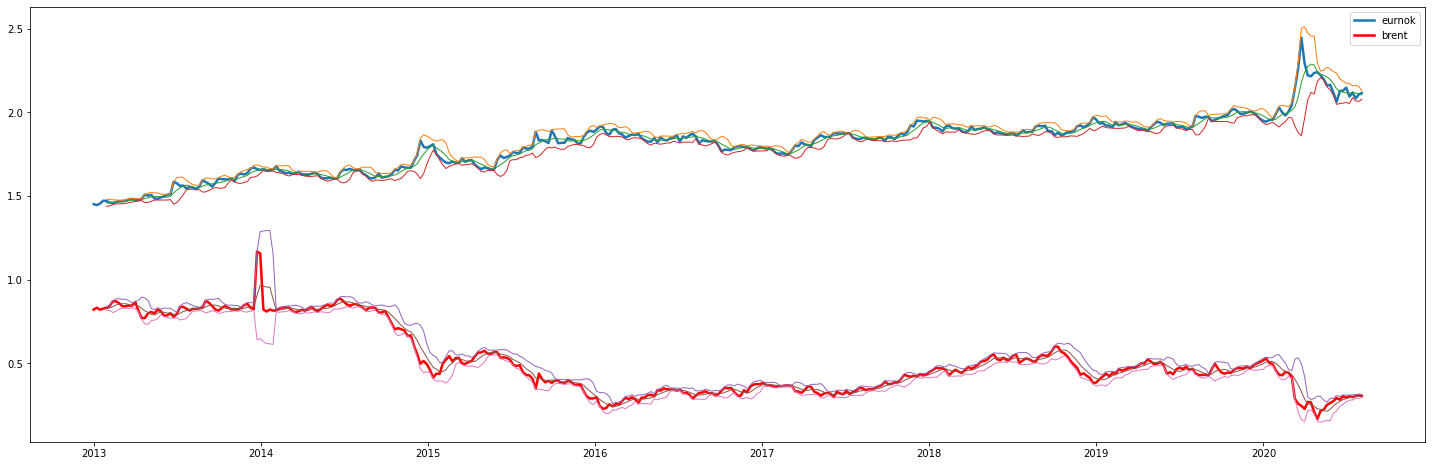

In [105]:
import matplotlib.pyplot as plt
import talib
import yfinance as yf

'''Plotting a correlation study with EURNOK against Brent Crude'''

start = "2013-01-01"

# load and set EURNOK
eurnok = yf.download("EURNOK=X", start, interval='1wk')['Open']
eurnok_norm = eurnok / ( max(eurnok)-min(eurnok) )
eurnok_upperband, eurnok_middleband, eurnok_lowerband = talib.BBANDS(eurnok_norm)

# load and set BRENT
brent = yf.download("BRNT.L", start, interval='1wk')['Open']
brent_norm = brent / ( max(brent)-min(brent) )
brent_upperband, brent_middleband, brent_lowerband = talib.BBANDS(brent_norm)

# Setup matplotlib for charting assets and indicators
plt.plot(eurnok_norm, label='eurnok')
plt.plot(brent_norm, color='red', label='brent')
for x in (eurnok_upperband, eurnok_middleband, eurnok_lowerband,
          brent_upperband, brent_middleband, brent_lowerband):
    plt.plot(x, linewidth=1)
    
plt.legend()

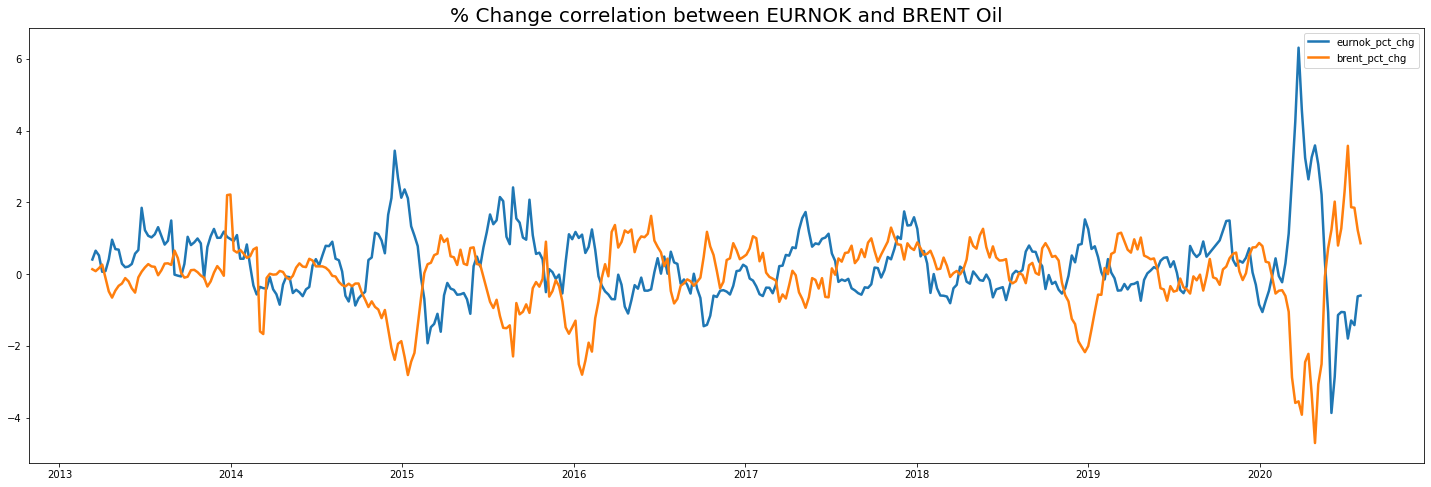

In [108]:
# % Change correlation between EURNOK and BRENT Oil

eurnok_pct_chg = eurnok_norm.pct_change().rolling(10).mean()
eurnok_pct_chg /= eurnok_pct_chg.std() # Normalised with std 
brent_pct_chg = brent_norm.pct_change().rolling(10).mean()
brent_pct_chg /= brent_pct_chg.std() # Normalised with std 

plt.title('% Change correlation between EURNOK and BRENT Oil', size=20)
plt.plot(eurnok_pct_chg, label='eurnok_pct_chg')
plt.plot(brent_pct_chg, label='brent_pct_chg')
plt.legend()

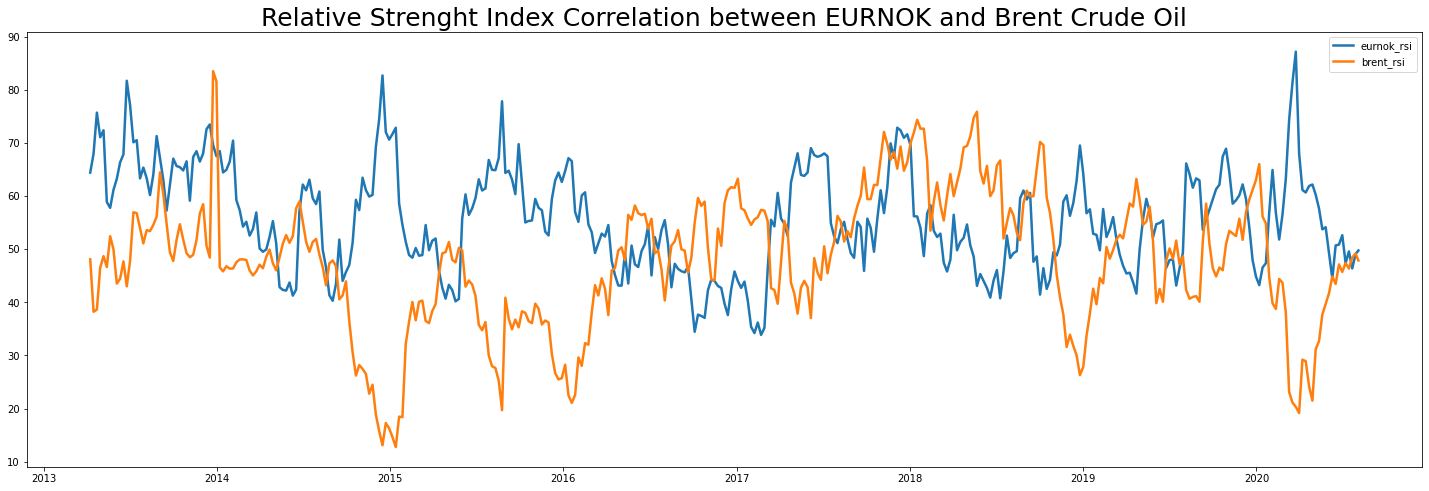

In [107]:
# Relative Strenght Index Correlation between EURNOK and Brent Crude Oil

eurnok_rsi = talib.RSI(eurnok_norm)
brent_rsi = talib.RSI(brent_norm)

plt.title('Relative Strenght Index Correlation between EURNOK and Brent Crude Oil', size=25)
plt.plot(eurnok_rsi, label='eurnok_rsi')
plt.plot(brent_rsi, label='brent_rsi')
plt.legend()

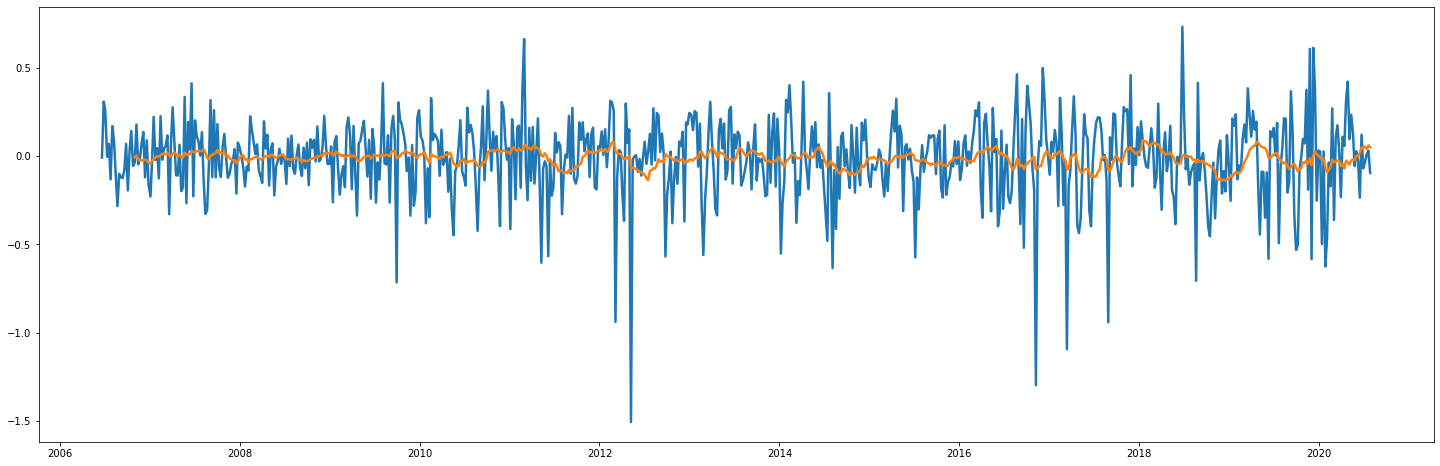

In [109]:
# Analyis on COT Hedge fund managers Long/Short positions

import quandl

cot = quandl.get("CFTC/067651_FO_ALL")
long_short_diff = cot['Money Manager Longs'].pct_change() - cot['Money Manager Shorts'].pct_change()
long_short_diff_sma = talib.SMA(long_short_diff, 20)

plt.plot(long_short_diff)
plt.plot(long_short_diff_sma)